# 1. Importing the Libraries

In [1]:
# importing packages
import yaml
import numpy as np 
import pandas as pd 
import panel as pn
from panel.template import FastListTemplate
import matplotlib.pyplot as plt
import mysql.connector
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# 2. Data Extraction

In [2]:
# # Access dataset paths
# dataset1_path = config['dataset_paths']['dataset1']
# dataset2_path = config['dataset_paths']['dataset2']
# dataset3_path = config['dataset_paths']['dataset3']


# # loading the data 
# # Use the paths from the configuration to read datasets
# amazon_df = pd.read_csv(dataset1_path)
# disney_df = pd.read_csv(dataset2_path)
# netflix_df = pd.read_csv(dataset3_path)

amazon_df = pd.read_csv("datasets/amazon_prime_titles.csv")
disney_df = pd.read_csv("datasets/disney_plus_titles.csv")
netflix_df = pd.read_csv("datasets/netflix_titles.csv")


# 3. Exploratory Data Analysis

## 3.1 Shape

In [3]:
amazon_df.shape

(9668, 12)

In [4]:
disney_df.shape

(1450, 12)

In [5]:
netflix_df.shape

(8807, 12)

## 3.2 Data Types

In [6]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [7]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [8]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 3.3 Checking missing values

In [9]:
amazon_df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
disney_df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [11]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 3.4 Checking duplicate values

In [12]:
amazon_df.duplicated().sum()

0

In [13]:
disney_df.duplicated().sum()

0

In [14]:
netflix_df.duplicated().sum()

0

## 3.4 Describe

In [15]:
amazon_df.describe().round(2)

,release_year
count,9668.00
mean,2008.34
std,18.92
min,1920.00
25%,2007.00
50%,2016.00
75%,2019.00
max,2021.00


In [16]:
disney_df.describe().round(2)

,release_year
count,1450.00
mean,2003.09
std,21.86
min,1928.00
25%,1999.00
50%,2011.00
75%,2018.00
max,2021.00


In [17]:
netflix_df.describe().round(2)

,release_year
count,8807.00
mean,2014.18
std,8.82
min,1925.00
25%,2013.00
50%,2017.00
75%,2019.00
max,2021.00


# 4. Data Transformation

## 4.1 Data Cleaning

### 4.1.1 Amazon

Country and date_added columns have more than 80% of the missing values and hence dropping them.

In [18]:
# Dropping columns 

amazon_df = amazon_df.drop(['country', 'date_added'], axis=1)

# Removing rows with null values in 'rating' column

amazon_df.dropna(subset=['rating'], inplace=True)

# Dropping irrelevant columns for analysis

amazon_df = amazon_df.drop(['show_id','director','cast'], axis=1)

### 4.1.2 Disney_Plus

In [19]:
# Dropping columns 

disney_df = disney_df.drop(['country', 'date_added'], axis=1)

# Removing rows with null values in 'rating' column

disney_df.dropna(subset=['rating'], inplace=True)

# Dropping irrelevant columns for analysis

disney_df = disney_df.drop(['show_id','director','cast'], axis=1)

### 4.1.3 Netflix

In [20]:
# Dropping columns 

netflix_df = netflix_df.drop(['country', 'date_added'], axis=1)

# Removing rows with null values in 'rating' column

netflix_df.dropna(subset=['rating', 'duration'], inplace=True)

# Dropping irrelevant columns for analysis

netflix_df = netflix_df.drop(['show_id','director','cast'], axis=1)

## 4.2 Adding new columns

In [21]:
amazon_df['platform'] = 'Amazon Prime'
amazon_df['headquarters'] = 'Seattle, Washington'
amazon_df['date_founded'] = '02/02/2005'

disney_df['platform'] = 'Disney Plus'
disney_df['headquarters'] = 'Los Angeles, California'
disney_df['date_founded'] = '11/12/2019'

netflix_df['platform'] = 'Netflix'
netflix_df['headquarters'] = 'Los Gatos, California'
netflix_df['date_founded'] = '08/29/1997'

## 4.3 Merging the data frames

Merging all the three data frames to a single dataframe for analysis.

In [22]:
streaming_platforms_df = pd.concat([amazon_df,disney_df,netflix_df], ignore_index=True)

streaming_platforms_df.head()

,type,title,release_year,rating,duration,listed_in,description,platform,headquarters,date_founded
0,Movie,Take Care Good Night,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime,"Seattle, Washington",02/02/2005
1,Movie,Zoombies,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...,Amazon Prime,"Seattle, Washington",02/02/2005
2,TV Show,Zoo Babies,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...,Amazon Prime,"Seattle, Washington",02/02/2005
3,TV Show,Zoë Coombs Marr: Bossy Bottom,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...,Amazon Prime,"Seattle, Washington",02/02/2005
4,Movie,Zoe,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...,Amazon Prime,"Seattle, Washington",02/02/2005


In [23]:
streaming_platforms_df.shape

(19578, 10)

## 4.4 Renaming the Column

In [24]:
streaming_platforms_df.rename(columns={'listed_in':'genre'}, inplace=True)

## 4.5 Formatting the data types

Convert the string data type of 'date_founded' to datetime.

In [25]:
streaming_platforms_df['date_founded'] = pd.to_datetime(streaming_platforms_df['date_founded'])

## 4.6 Replacing the column values

The dataset contains several redundant rating categories. For example, rating category 16, AGES_16_, 16+ represent the same category 16+. For analysis purpose, we replace the rating category values to a unified value.

In [26]:
streaming_platforms_df['rating'].value_counts()

rating
TV-MA       3284
TV-14       2447
13+         2117
R           1809
16+         1547
TV-PG       1333
ALL         1268
18+         1243
PG-13        949
PG           776
TV-G         619
TV-Y7        504
TV-Y         431
G            387
7+           385
NR           303
TV-NR        105
UNRATED       33
TV-Y7-FV      19
NC-17          6
AGES_18_       3
NOT_RATE       3
UR             3
AGES_16_       2
ALL_AGES       1
16             1
Name: count, dtype: int64

In [27]:
streaming_platforms_df['rating'].replace(['16','AGES_16_'], '16+', inplace=True)
streaming_platforms_df['rating'].replace(['AGES_18_'], '18+', inplace=True)
streaming_platforms_df['rating'].replace(['ALL_AGES'], 'ALL', inplace=True)
streaming_platforms_df['rating'].replace(['TV-NR','UNRATED','NOT_RATE','UR'], 'NR', inplace=True)

In [28]:
streaming_platforms_df.head()

,type,title,release_year,rating,duration,genre,description,platform,headquarters,date_founded
0,Movie,Take Care Good Night,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime,"Seattle, Washington",2005-02-02
1,Movie,Zoombies,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...,Amazon Prime,"Seattle, Washington",2005-02-02
2,TV Show,Zoo Babies,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...,Amazon Prime,"Seattle, Washington",2005-02-02
3,TV Show,Zoë Coombs Marr: Bossy Bottom,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...,Amazon Prime,"Seattle, Washington",2005-02-02
4,Movie,Zoe,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...,Amazon Prime,"Seattle, Washington",2005-02-02


In [29]:
streaming_platforms_df.tail()

,type,title,release_year,rating,duration,genre,description,platform,headquarters,date_founded
19573,Movie,Zodiac,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflix,"Los Gatos, California",1997-08-29
19574,TV Show,Zombie Dumb,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Netflix,"Los Gatos, California",1997-08-29
19575,Movie,Zombieland,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflix,"Los Gatos, California",1997-08-29
19576,Movie,Zoom,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflix,"Los Gatos, California",1997-08-29
19577,Movie,Zubaan,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Netflix,"Los Gatos, California",1997-08-29


# 5. Data Loading

## 5.1 Connect to Database and Create Tables

In [30]:
try:


    # Load the configuration file
    with open('config.yml', 'r') as file:
        config = yaml.safe_load(file)

    # Access the database configuration
    db_config = config['database_config']
    # host = db_config['host']
    host = db_config['host']
    user = db_config['user']
    password = db_config['password']
    database = db_config['database']
    
    # Connect to MySQL
    connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password
    )
   
    cursor = connection.cursor()

    # Name of the database you wish to create
    database_name = 'Group_5'
    
    # SQL statement to execute
    sql = f"CREATE DATABASE IF NOT EXISTS {database_name}"

    # Execute the SQL statement
    cursor.execute(sql)

    # Select Database
    cursor.execute(f"USE {database_name}")

    
    # Define SQL statements to create tables
    create_movie_table_query = """
    CREATE TABLE IF NOT EXISTS movie (
        id INT AUTO_INCREMENT PRIMARY KEY,
        title VARCHAR(255),
        release_year INT,
        rating VARCHAR(10),
        duration VARCHAR(20),
        description TEXT,
        platform VARCHAR(50),
        headquarters VARCHAR(100),
        date_founded DATE
    )
    """

    create_genre_table_query = """
    CREATE TABLE IF NOT EXISTS genre (
        id INT AUTO_INCREMENT PRIMARY KEY,
        genre_name VARCHAR(255) UNIQUE
    )
    """

    create_streaming_platform_table_query = """
    CREATE TABLE IF NOT EXISTS streaming_platform (
        id INT AUTO_INCREMENT PRIMARY KEY,
        platform_name VARCHAR(50) UNIQUE,
        headquarters VARCHAR(100),
        date_founded DATE
    )
    """

    create_tv_show_table_query = """
    CREATE TABLE IF NOT EXISTS tv_show (
        id INT AUTO_INCREMENT PRIMARY KEY,
        title VARCHAR(255),
        release_year INT,
        rating VARCHAR(10),
        duration VARCHAR(20),
        description TEXT,
        platform VARCHAR(50),
        headquarters VARCHAR(100),
        date_founded DATE
    )
    """

    # Execute the queries
    cursor.execute(create_movie_table_query)
    cursor.execute(create_genre_table_query)
    cursor.execute(create_streaming_platform_table_query)
    cursor.execute(create_tv_show_table_query)

    # Commit the transaction
    connection.commit()

    print("Tables created successfully!")

except mysql.connector.Error as error:
    print("Error:", error)


Tables created successfully!


In [31]:
# # Create rating table
# try:
#     cursor.execute("""
#     CREATE TABLE IF NOT EXISTS rating (
#         id INT AUTO_INCREMENT PRIMARY KEY,
#         rating_value VARCHAR(10) NOT NULL
#     )
#     """)
    
#     print("Table 'rating' created successfully!")

# except mysql.connector.Error as error:
#     print("Error:", error)

## 5.2 View New Tables

In [32]:
#See the tables for Group_5 schema 
query = "SHOW TABLES"
cursor.execute(query)
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

genre
movie
streaming_platform
tv_show


## 5.3 Load data into SQL database tables 

In [33]:
# Iterate over each row in the DataFrame
for index, row in streaming_platforms_df.iterrows():
    # Check if the platform already exists
    platform_query = "SELECT * FROM streaming_platform WHERE platform_name = %s"
    cursor.execute(platform_query, (row['platform'],))
    existing_platform = cursor.fetchone()

    if not existing_platform:
        # Insert into streaming_platform table
        streaming_platform_query = "INSERT INTO streaming_platform (platform_name, headquarters, date_founded) VALUES (%s, %s, %s)"
        streaming_platform_data = (row['platform'], row['headquarters'], str(row['date_founded']))
        cursor.execute(streaming_platform_query, streaming_platform_data)

    # Insert into movie or TV show table
    if row['type'] == 'Movie':
        movie_query = "INSERT INTO movie (title, release_year, rating, duration, description, platform, headquarters, date_founded) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
        movie_data = (row['title'], row['release_year'], row['rating'], row['duration'], row['description'], row['platform'], row['headquarters'], str(row['date_founded']))
        cursor.execute(movie_query, movie_data)
    elif row['type'] == 'TV Show':
        tv_show_query = "INSERT INTO tv_show (title, release_year, rating, duration, description, platform, headquarters, date_founded) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
        tv_show_data = (row['title'], row['release_year'], row['rating'], row['duration'], row['description'], row['platform'], row['headquarters'], str(row['date_founded']))
        cursor.execute(tv_show_query, tv_show_data)

# Commit the changes and close the connection
connection.commit()

In [51]:
# Still need to do genre, which has multiple genres separated by commas in each response. 

# 6. Data Visualizations

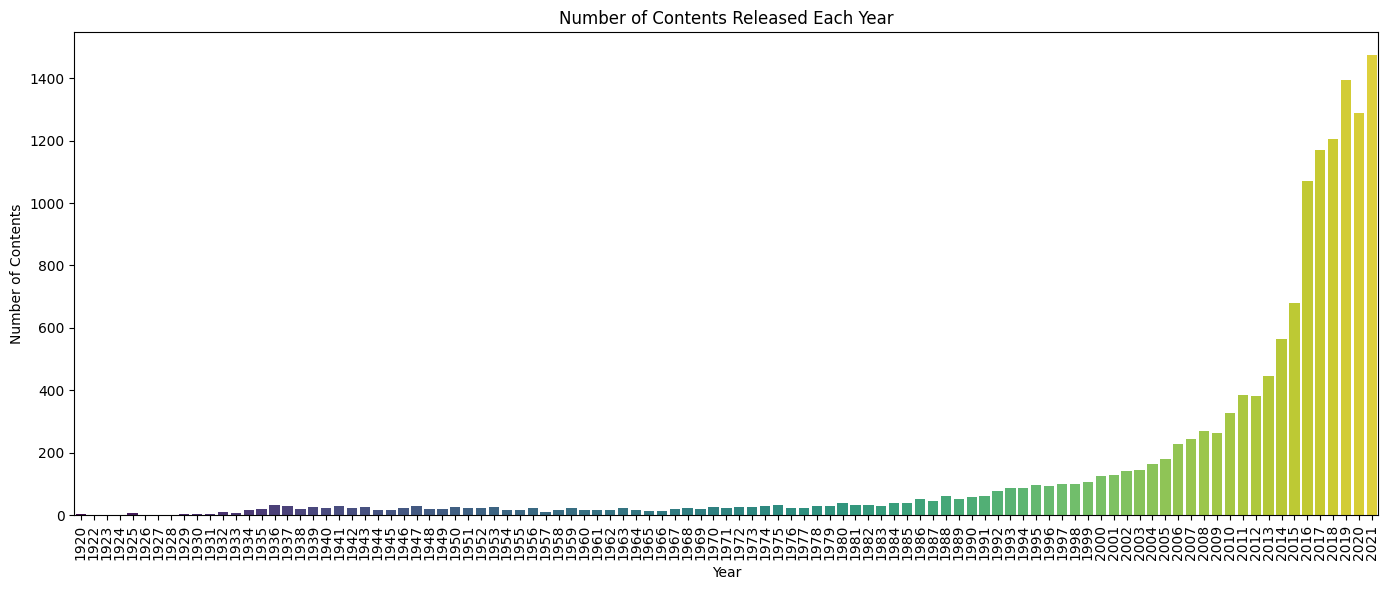

In [58]:
query = """
SELECT release_year, COUNT(*) as count
FROM movie
GROUP BY release_year
ORDER BY release_year;
"""

# Use pandas to load the query result into a DataFrame
df_content_per_year = pd.read_sql(query, connection)


# Plotting the data
def create_yearly_content_plot(df):
    plt.figure(figsize=(14,6))
    sns.barplot(x=df['release_year'], y=df['count'], palette="viridis")
    plt.title('Number of Contents Released Each Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Contents')
    plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
    plt.tight_layout()
    return plt.gcf()  # Return the figure object


# Create the plot and wrap it in a Matplotlib pane
contents_released_each_year = pn.pane.Matplotlib(create_yearly_content_plot(df_content_per_year), tight=True)

In [36]:
print(disney_df.columns)

Index(['type', 'title', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'platform', 'headquarters', 'date_founded'],
      dtype='object')


In [37]:
# #Finding number of contents by genre
# #Need to separate each strings in genre since they can have multiple genres in a single program
# genre_count = disney_df['genre'].str.split(',').explode().str.strip().value_counts()

# plt.figure(figsize=(12,8))`
# sns.barplot(y=genre_count.index, x=genre_count.values, palette="viridis")
# plt.xlabel('Number of Contents')
# plt.ylabel('Genre')
# plt.title('Content Counts by Genre')
# plt.show()

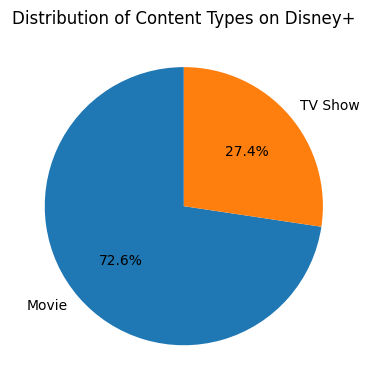

In [61]:
# #Simply looking at percentage of Movie and TV shows 
# Function to create a pie chart for content type distribution
def create_content_type_pie_chart(df):
    content_type_dist = df['type'].value_counts()
    fig, ax = plt.subplots(figsize=(4,4))  # Create a figure with a single Axes
    content_type_dist.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title('Distribution of Content Types on Disney+')
    ax.set_ylabel('')  # Hiding the y-axis label as it is distracting
    plt.tight_layout()
    return fig  # Return the figure object

# Create the pie chart and wrap it in a Matplotlib pane
pie_chart_pane = pn.pane.Matplotlib(create_content_type_pie_chart(disney_df), tight=True)

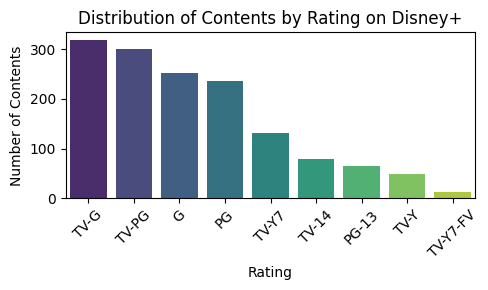

In [65]:
# rating_counts = disney_df['rating'].value_counts()

# plt.figure(figsize=(5,3))
# sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
# plt.title('Distribution of Contents by Rating on Disney+')
# plt.xlabel('Rating')
# plt.ylabel('Number of Contents')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


# Visualization: Distribution of Contents by Rating on Disney+
def create_rating_distribution_plot():
    rating_counts = disney_df['rating'].value_counts()
    plt.figure(figsize=(5,3))
    sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
    plt.title('Distribution of Contents by Rating on Disney+')
    plt.xlabel('Rating')
    plt.ylabel('Number of Contents')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt.gcf()


plot_pane_3 = pn.pane.Matplotlib(create_rating_distribution_plot(), tight=True)

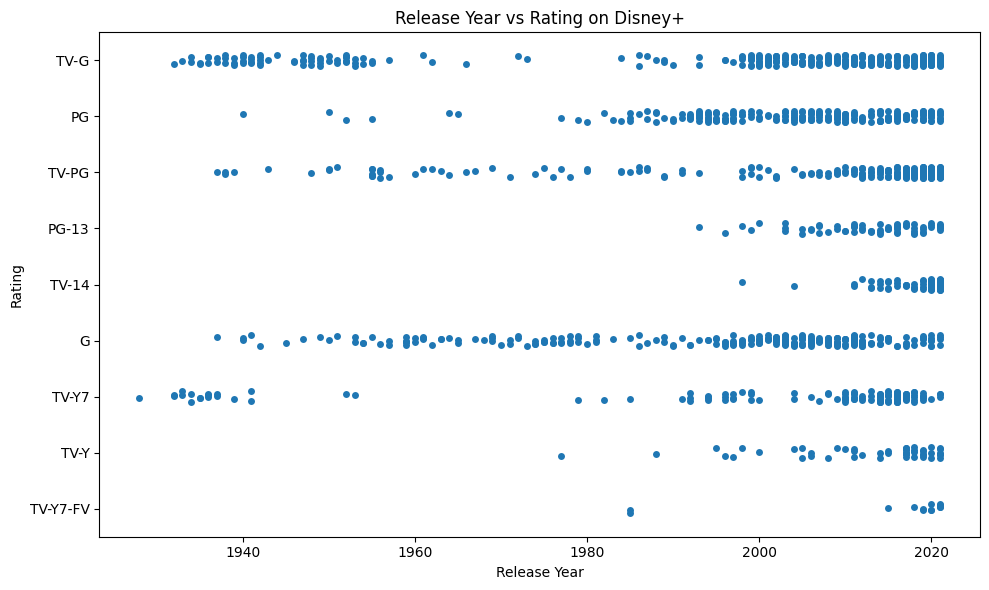

In [66]:
# sns.stripplot(x='release_year' , y='rating', data=disney_df)
# Visualization: Stripplot of Release Year vs Rating
def create_stripplot():
    plt.figure(figsize=(10, 6))
    sns.stripplot(x='release_year', y='rating', data=disney_df)
    plt.title('Release Year vs Rating on Disney+')
    plt.xlabel('Release Year')
    plt.ylabel('Rating')
    plt.tight_layout()
    return plt.gcf()

plot_pane_4 = pn.pane.Matplotlib(create_stripplot(), tight=True)

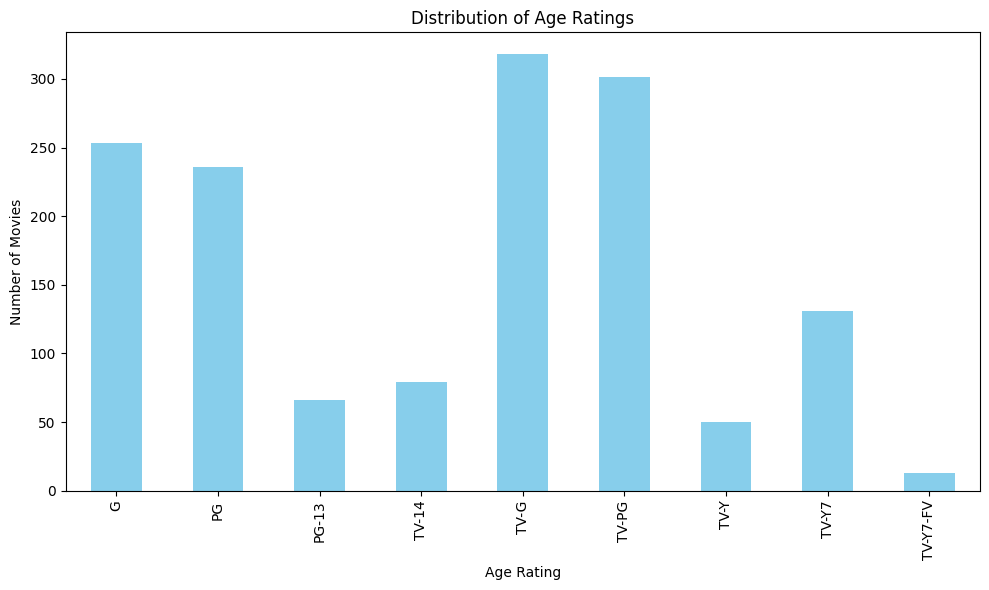

In [73]:
# Visualization 5: Distribution of Age Ratings
def create_age_ratings_plot():
    rating_counts = disney_df['rating'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    rating_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Age Ratings')
    plt.xlabel('Age Rating')
    plt.ylabel('Number of Movies')
    plt.tight_layout()
    return plt.gcf()  # Return the figure object

# Wrap the plot in a Matplotlib pane
plot_pane_5 = pn.pane.Matplotlib(create_age_ratings_plot(), tight=True)

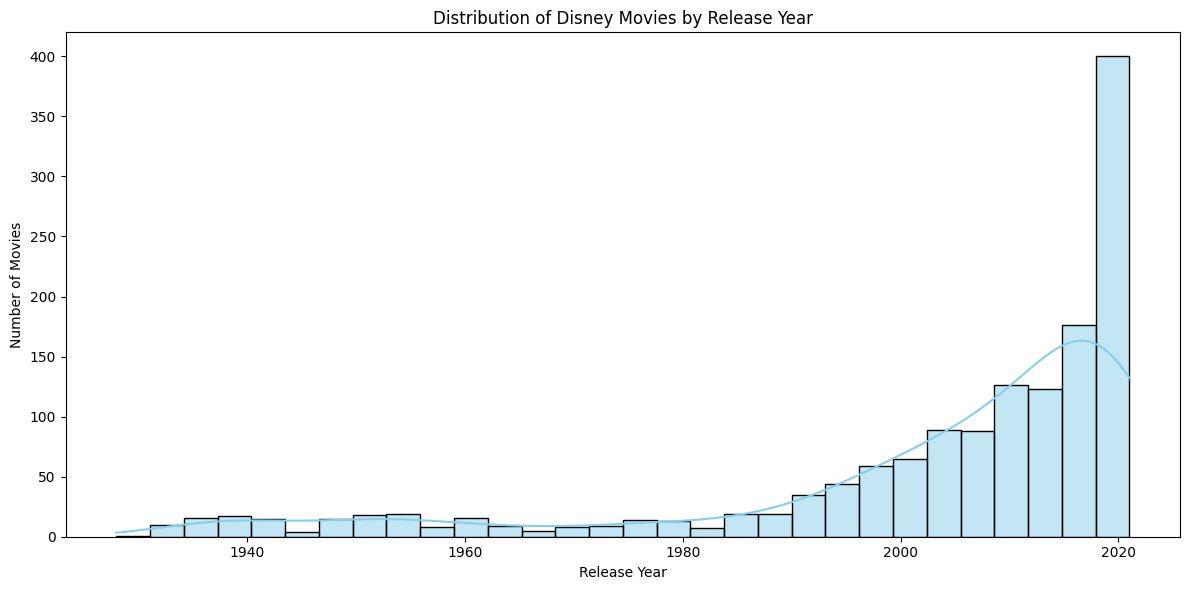

In [86]:
# Visualization 6: Distribution of Disney movies by release year
def viz_release_year_disney():
    plt.figure(figsize=(12, 6))
    sns.histplot(disney_df['release_year'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Disney Movies by Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Movies')
    plt.tight_layout()
    return plt.gcf()
    
panel_viz_6 = pn.pane.Matplotlib(viz_release_year_disney(), tight=True)

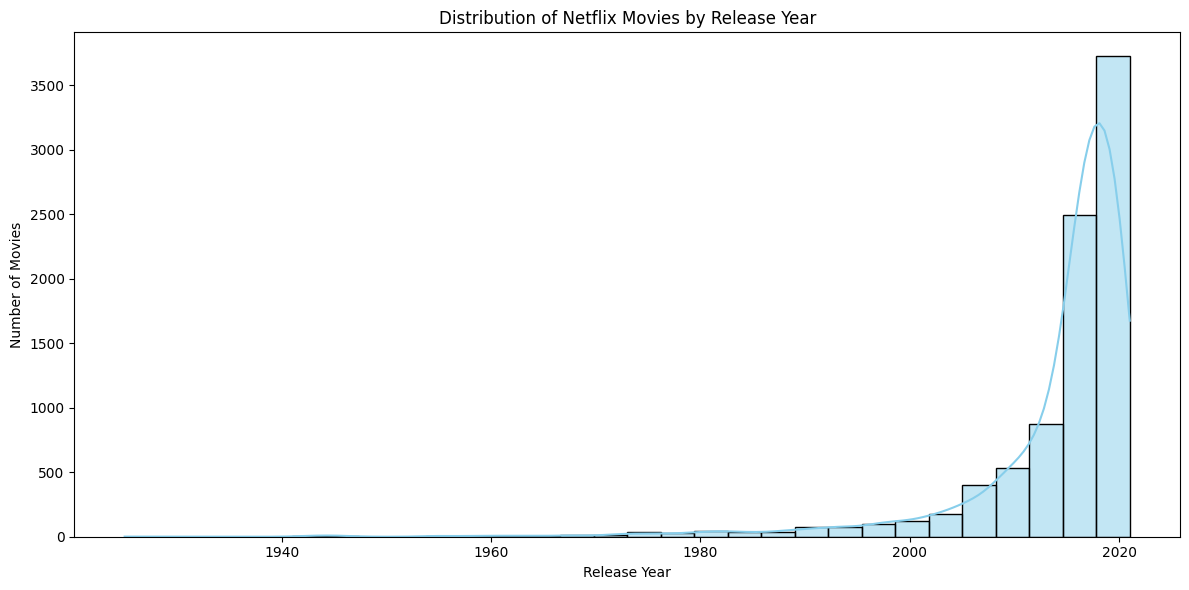

In [87]:
# Visualization 7: Distribution of Netflix movies by release year
def viz_release_year_netflix():
    plt.figure(figsize=(12, 6))
    sns.histplot(netflix_df['release_year'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Netflix Movies by Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Movies')
    plt.tight_layout()
    return plt.gcf()

panel_viz_7 = pn.pane.Matplotlib(viz_release_year_netflix(), tight=True)

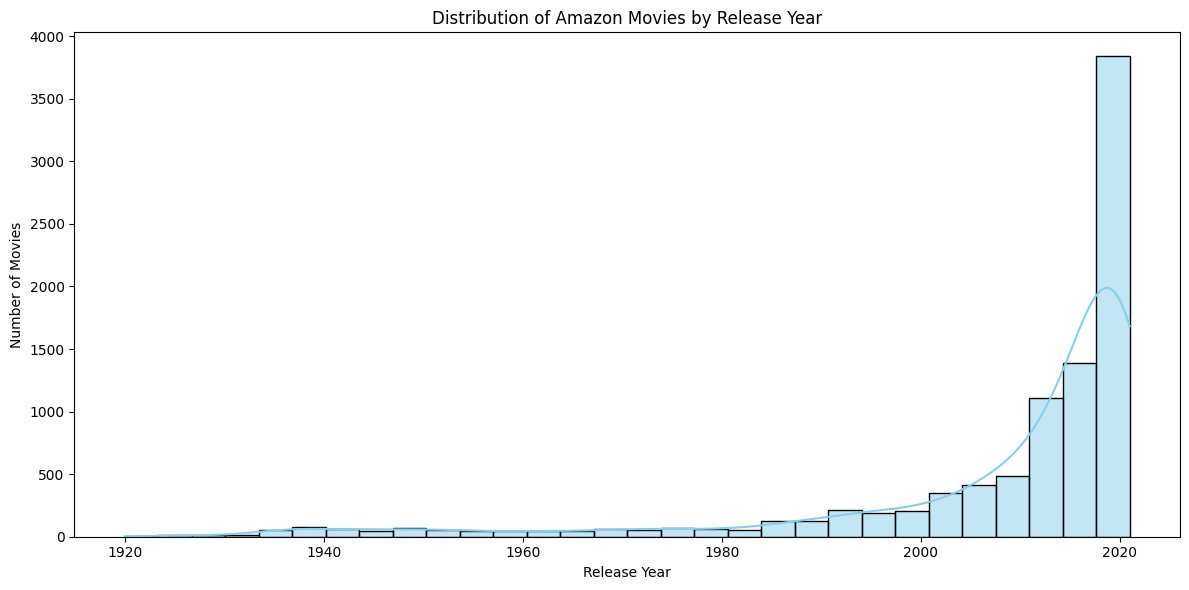

In [79]:
# Visualization 8: Distribution of Amazon movies by release year
def viz_release_year_amazon():
    plt.figure(figsize=(12, 6))
    sns.histplot(amazon_df['release_year'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Amazon Movies by Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Movies')
    plt.tight_layout()
    return plt.gcf()

panel_viz_8 = pn.pane.Matplotlib(viz_release_year_amazon(), tight=True)

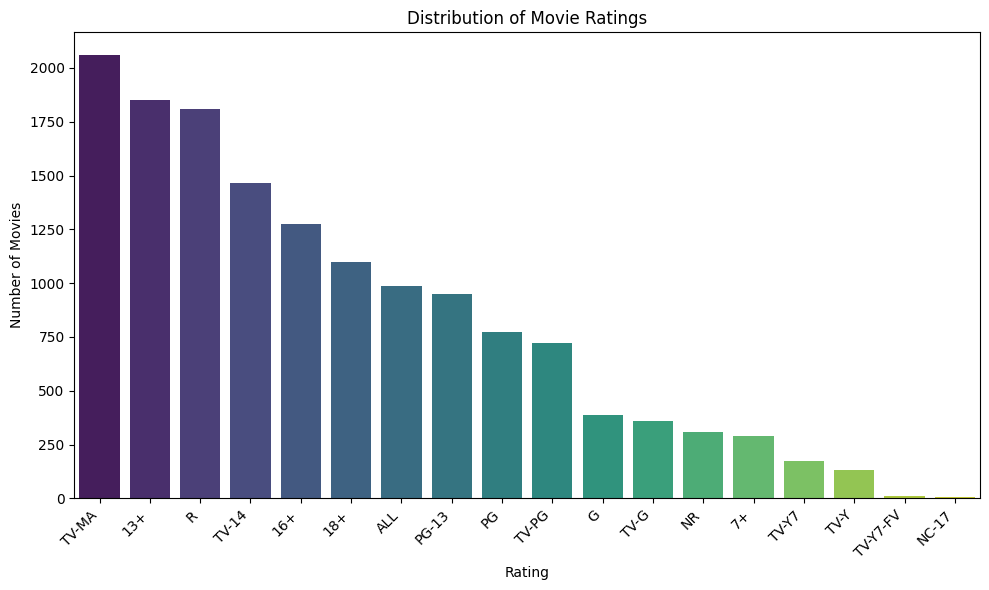

In [80]:
# Visualization 9: Distribution of movie ratings
def viz_movie_ratings():
    movies_df = pd.read_sql("SELECT * FROM movie;", connection)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='rating', data=movies_df, order=movies_df['rating'].value_counts().index, palette='viridis')
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt.gcf()

panel_viz_9 = pn.pane.Matplotlib(viz_movie_ratings(), tight=True)

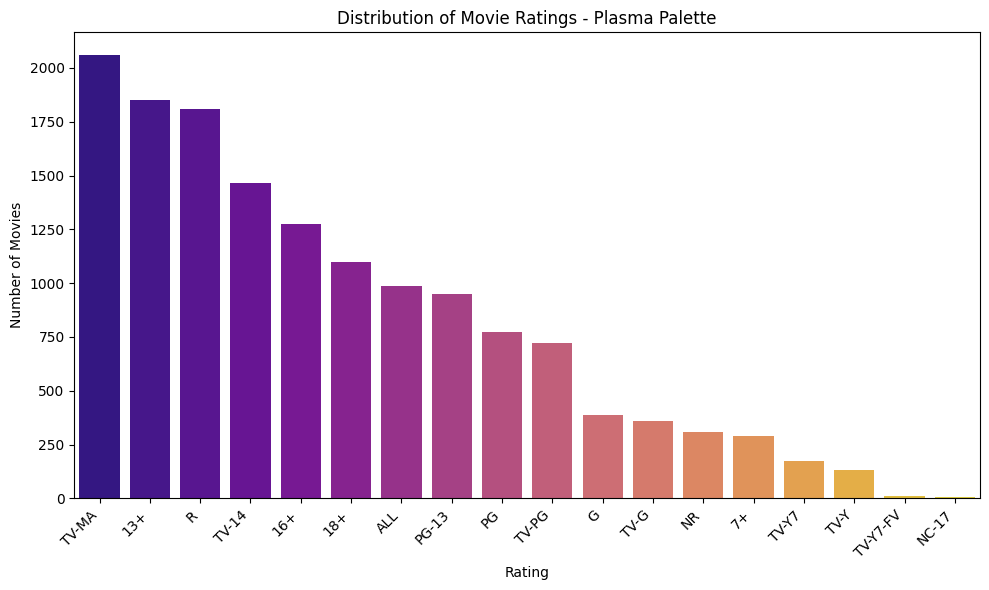

In [81]:
# Visualization 10: Same as 9, but with a different color palette
def viz_movie_ratings_plasma():
    movies_df = pd.read_sql("SELECT * FROM movie;", connection)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='rating', data=movies_df, order=movies_df['rating'].value_counts().index, palette='plasma')
    plt.title('Distribution of Movie Ratings - Plasma Palette')
    plt.xlabel('Rating')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt.gcf()

panel_viz_10 = pn.pane.Matplotlib(viz_movie_ratings_plasma(), tight=True)

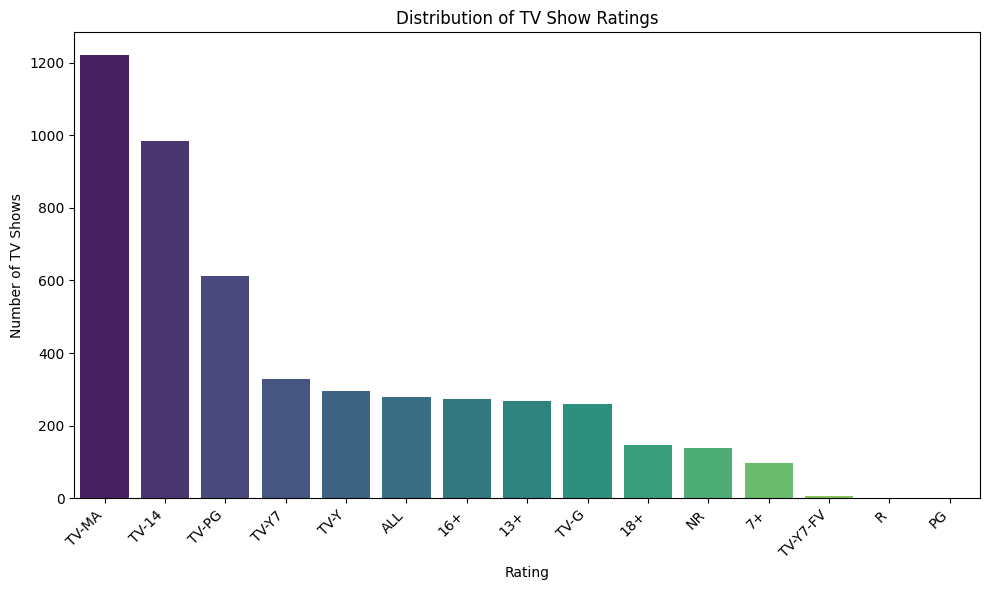

In [82]:
# Visualization 11: Distribution of TV show ratings
def viz_tv_show_ratings():
    shows_df = pd.read_sql("SELECT * FROM tv_show;", connection)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='rating', data=shows_df, order=shows_df['rating'].value_counts().index, palette='viridis')
    plt.title('Distribution of TV Show Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Number of TV Shows')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt.gcf()

panel_viz_11 = pn.pane.Matplotlib(viz_tv_show_ratings(), tight=True)

In [48]:
# # **** NO GENRE INFO AVAILABLE ****
# # Top genres
# top_genres = data['listed_in'].value_counts().head(10)

# # Plot Top Genres
# plt.figure(figsize=(12, 6))
# sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted')
# plt.title('Top 10 Genres')
# plt.xlabel('Number of Movies')
# plt.ylabel('Genre')
# plt.show()

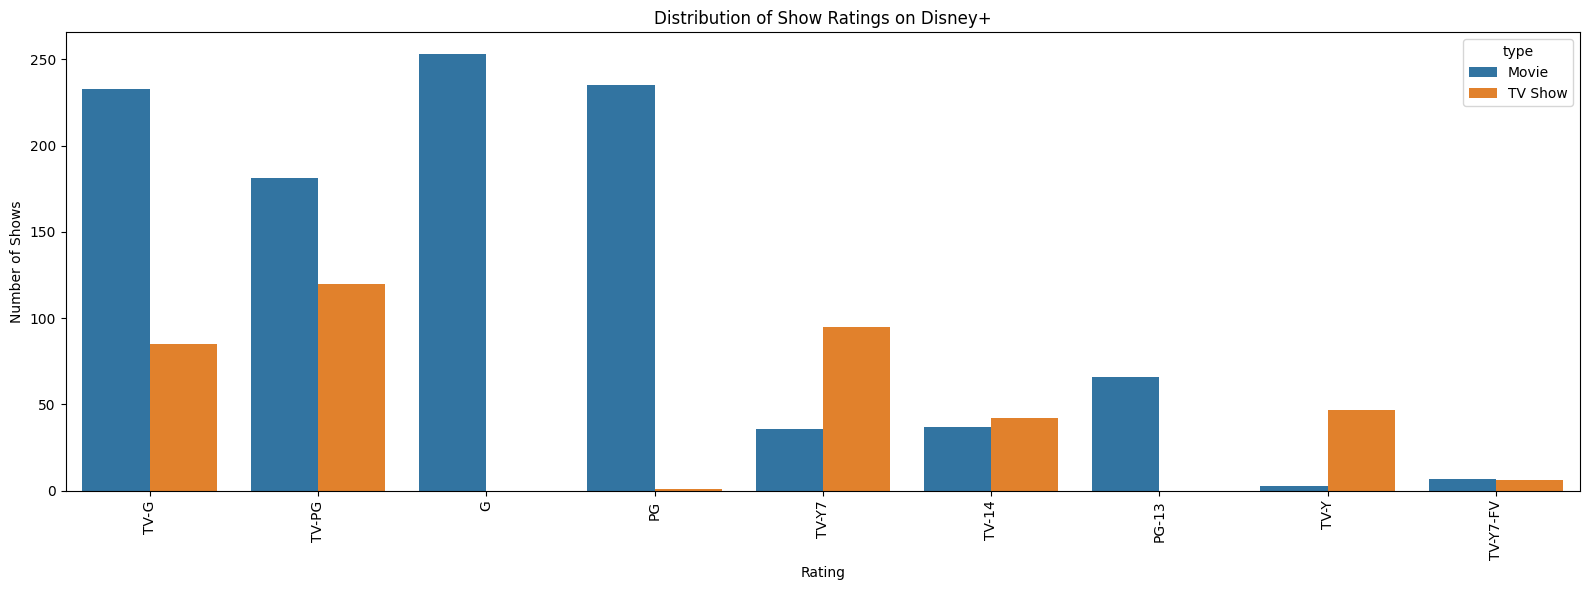

In [84]:
# Visualization 12: Distribution of show ratings on Disney+
def viz_disney_ratings():
    plt.figure(figsize=(16,6))
    sns.countplot(x='rating', data=disney_df, hue='type', order=disney_df['rating'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Show Ratings on Disney+')
    plt.xlabel('Rating')
    plt.ylabel('Number of Shows')
    plt.tight_layout()
    return plt.gcf()

panel_viz_12 = pn.pane.Matplotlib(viz_disney_ratings(), tight=True)

# 7. Serve Dashboard
## 7.1 Create a FastListTemplate

In [89]:
# Create the FastListTemplate and add the plot pane to it
template = FastListTemplate(
    title='Content Dashboard',
    main=[
        contents_released_each_year, 
        pie_chart_pane, 
        plot_pane_3, 
        plot_pane_4,
        plot_pane_5,
        panel_viz_6,
        panel_viz_7,
        panel_viz_8,
        panel_viz_9,
        panel_viz_10,
        panel_viz_11,
        panel_viz_12,
        
    ],
    accent_base_color='accent-color',
    header_background='header-background'
)

## 7.2 Serve the Dashbaord

In [90]:
# Serve the dashboard
template.servable()
pn.serve(template)

Launching server at http://localhost:65282
